# 从视频中提取图片

In [2]:
import os
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt

In [5]:
VIDEO_PATH = "./video"
EXTRACT_FREQUENCY = 48
DST_FOLDER = "./frame"

In [10]:
def rename_file(path):
    for file in os.listdir(path):
        title = file.split(".")[1]
        os.rename(os.path.join(path,file),os.path.join(path,title+".rmvb"))
rename_file(VIDEO_PATH)

In [38]:
def extract_frame():
    for file in tqdm(os.listdir(VIDEO_PATH)):
        video = cv2.VideoCapture(os.path.join(VIDEO_PATH,file))
        count,index = 1,1
        while True:
            _,frame = video.read()
            if frame is None:
                break
            if count % EXTRACT_FREQUENCY == 0:
                save_path = "{}/{}{}{:>04d}.jpg".format(DST_FOLDER,file.split(".")[0],"_", index)
                cv2.imwrite(save_path, frame)
                index += 1
            count += 1
        video.release()
extract_frame()


100%|███████████████████████████████████████████████████████████████████████████████| 78/78 [3:17:54<00:00, 150.08s/it]


In [31]:
print ('{1},{0},{1}'.format('chuhao',20))

20,chuhao,20


# 从图片中提取头像

[309  32 122 122]
[[[ 33  24  27]
  [ 32  25  28]
  [ 33  26  31]
  ..., 
  [ 75  81 116]
  [ 71  77 112]
  [ 65  72 105]]

 [[ 33  24  27]
  [ 33  24  27]
  [ 32  25  30]
  ..., 
  [ 63  69 104]
  [ 62  68 103]
  [ 58  64  99]]

 [[ 33  24  27]
  [ 33  24  27]
  [ 32  25  30]
  ..., 
  [ 58  64  99]
  [ 61  65 100]
  [ 58  62  97]]

 ..., 
 [[ 45  41  47]
  [ 45  41  47]
  [ 44  40  46]
  ..., 
  [ 46  42  54]
  [ 46  42  54]
  [ 46  42  54]]

 [[ 44  37  44]
  [ 44  37  44]
  [ 46  39  46]
  ..., 
  [ 44  40  51]
  [ 44  40  52]
  [ 44  40  52]]

 [[ 41  34  41]
  [ 42  35  42]
  [ 45  38  45]
  ..., 
  [ 44  40  51]
  [ 43  39  50]
  [ 44  40  52]]]


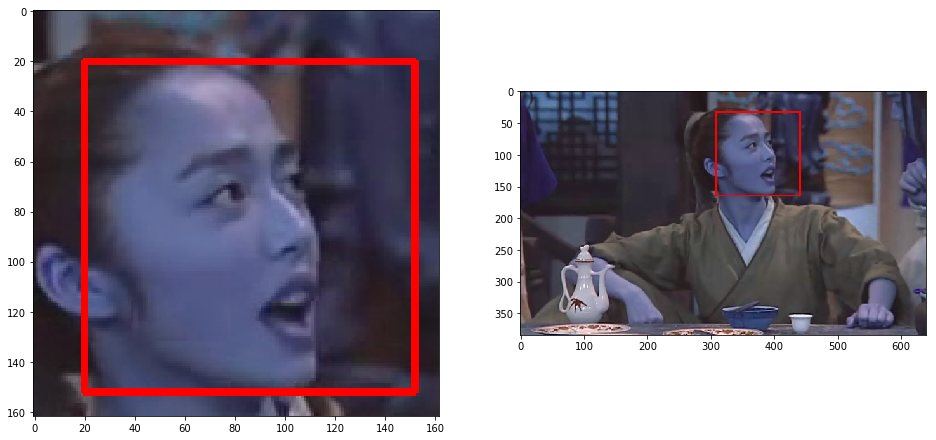

In [7]:
xml_config = "./haarcascade_frontalface_default.xml"
# 读取图片
img = cv2.imread("./10_1246.jpg")

# 加载分类器
classfier = cv2.CascadeClassifier(xml_config)

#识别出人脸后要画的边框的颜色，RGB格式
color = (255, 0, 0)

# 灰度转换,减少计算量
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

#人脸检测，1.2和2分别为图片缩放比例和需要检测的有效点数
faceRects = classfier.detectMultiScale(img_gray, scaleFactor = 1.5, minNeighbors = 5, minSize = (5,5))

if len(faceRects) > 0:            #大于0则检测到人脸                                   
    for faceRect in faceRects:  #单独框出每一张人脸
        x, y, w, h = faceRect
        print(faceRect)
        subimg = img[y-20:y+h+20,x-20:x+w+20]
        print(subimg)
        cv2.rectangle(img, (x, y), (x + w + 10, y + h + 10), color, 2)
plt.figure(figsize=(16,8))
plt.subplot(121)
plt.imshow(subimg)
plt.subplot(122)
plt.imshow(img)
plt.show()